In [11]:
# 1.2 Data Understanding e Data Preparation
# usada para carregar, organizar e manipular o conjunto de dados em um formato
#  estruturado, como DataFrame
import pandas as pd

# Carregando o dataset
penguins = pd.read_csv("penguins.csv")

# Exibindo as primeiras linhas do dataset
penguins.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
# Exibe o número de valores ausentes por coluna
print(penguins.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [13]:
# para ajustar os dados a uma distribuição normal padrão, garantindo que todas as variáveis
#  tenham média zero e desvio padrão igual a 1. Isso evita que variáveis com escalas maiores 
# dominem o modelo.

# Classe uusada para normalizar ou padronizar os dados
from sklearn.preprocessing import StandardScaler

# Seleção e descrição das variáveis numéricas para o modelo de clustering
Xpenguins = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Tratamento de valores ausentes (substituição por média da coluna)
Xpenguins = Xpenguins.fillna(Xpenguins.mean())

# Normalização das variáveis numéricas
scaler = StandardScaler()
Xpenguins_scaled = scaler.fit_transform(Xpenguins)


In [14]:
# Exibe o número de valores ausentes por coluna
print(Xpenguins.isnull().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64


In [15]:
# 1.3 Modeling: Determinação do número ideal de clusters usando o método Elbow
# Importa o algoritmo de agrupamento K-Means da biblioteca scikit-learn
# erá utilizado para agrupar os dados em diferentes clusters, ou seja, 
# identificar padrões ou grupos no dataset.
from sklearn.cluster import KMeans

wcsse = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Xpenguins_scaled)
    wcsse.append(kmeans.inertia_)


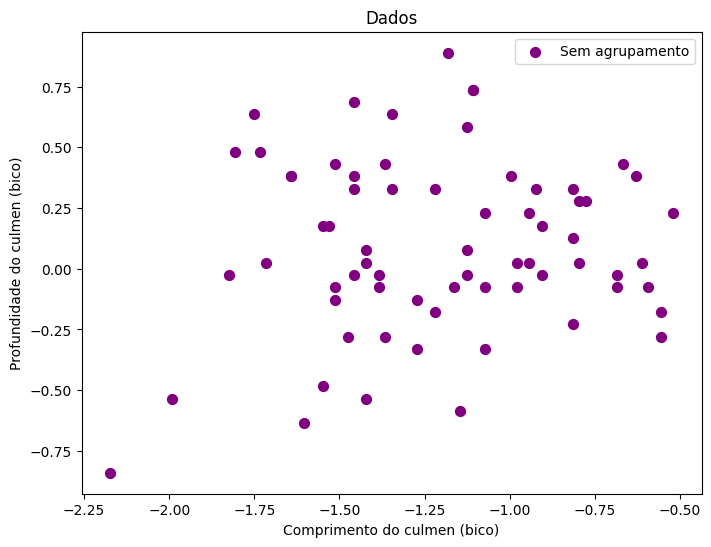

In [16]:
# 1.4 Evaluation: Visualização e avaliação dos clusters formados

# Biblioteca usada para criar gráficos e visualizações.
import matplotlib.pyplot as plt

# Dados sem agrupamento

# Definindo cores para cada cluster
colors = ['purple'] 
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plotando cada ponto com a cor do seu respectivo cluster
for i in range(1):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Sem agrupamento'
    )


plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Dados")
plt.legend()
plt.show()


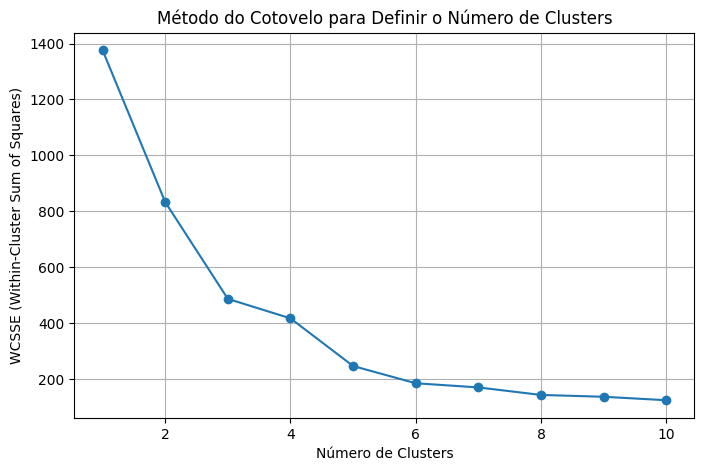

In [17]:
# Plotando o gráfico do método do cotovelo (Elbow Method)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcsse, marker='o')
plt.title('Método do Cotovelo para Definir o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSSE (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
# Definindo o número de clusters com base no Elbow
n_clusters = 3 

# Parâmetros alternativos
param_combinations = [ {"init": "random", "n_clusters": n_clusters, "metric": "euclidean"} ]


In [34]:
# Aplicação dos modelos com diferentes parâmetros e avaliação
results = []
for params in param_combinations:
    kmeans = KMeans(n_clusters=params["n_clusters"], init=params["init"], random_state=3)
    kmeans.fit(Xpenguins_scaled)
    
    # Guardar os resultados
    results.append({
        "inicialização": params["init"],
        "WCSSE": kmeans.inertia_,
        "Centroides": kmeans.cluster_centers_,
        "Labels": kmeans.labels_
    })

In [35]:
# Visualizar os dados armazenados
print(f"Modelo com inicialização {params['init']} e distância {params['metric']}:\n")
print("Centroides dos clusters:\n", kmeans.cluster_centers_, "\n")
print("WCSSE:", kmeans.inertia_)
print("-" * 50)

Modelo com inicialização k-means++ e distância euclidean:

Centroides dos clusters:
 [[ 0.88014656  0.76091601  0.19198729 -0.43831116]
 [-0.96943473  0.54299781 -0.10286725 -0.69208256]
 [ 0.65914815 -1.10319208  0.01222874  1.09494883]] 

WCSSE: 654.5232338830422
--------------------------------------------------


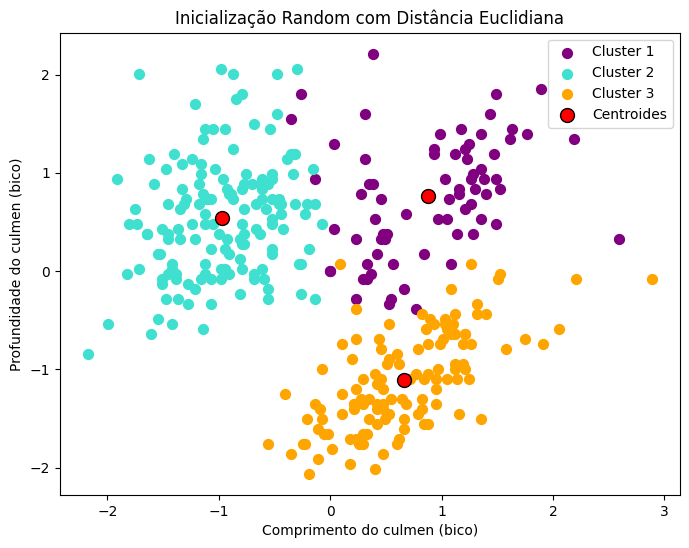

O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# 1.4 Evaluation: Visualização e avaliação dos clusters formados

# Medida de distância Euclididana 

# Definindo cores para cada cluster
colors = ['purple', 'turquoise', 'orange'] 
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plotando cada ponto com a cor do seu respectivo cluster
for i in range(n_clusters):  # Número de clusters = 3
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides em uma cor destacada
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

# Legenda
plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Inicialização Random com Distância Euclidiana")
plt.legend()
plt.show()

# Criação de dataset de teste com uma única linha para verificação do modelo
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])
cluster_predito = kmeans.predict(novo_pinguim)
print(f"O novo pinguim pertence ao cluster: {cluster_predito[0]}")


In [41]:
# Parâmetros alternativos
param_combinations = [ {"init": "k-means++", "n_clusters": n_clusters, "metric": "euclidean"}]


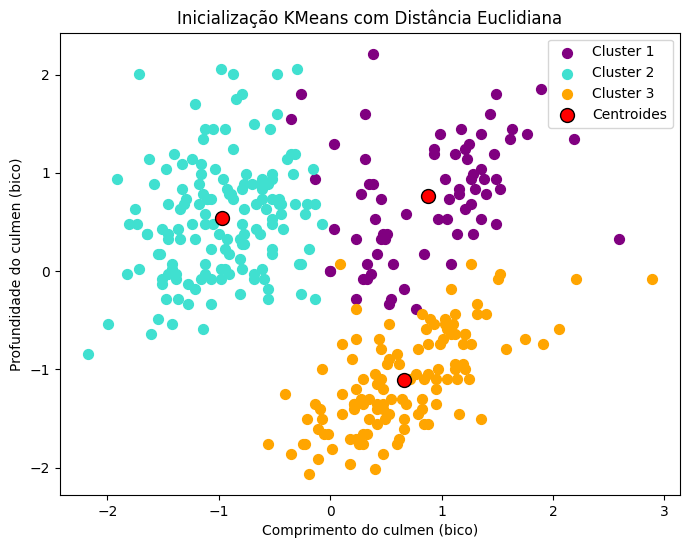

O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
# 1.4 Evaluation: Visualização e avaliação dos clusters formados

# Medida de distância Euclididana 

# Definindo cores para cada cluster
colors = ['purple', 'turquoise', 'orange'] 
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

# Plotando cada ponto com a cor do seu respectivo cluster
for i in range(n_clusters):  # Número de clusters = 3
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides em uma cor destacada
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

# Legenda
plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Inicialização KMeans com Distância Euclidiana")
plt.legend()
plt.show()

# Criação de dataset de teste com uma única linha para verificação do modelo
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])
cluster_predito = kmeans.predict(novo_pinguim)
print(f"O novo pinguim pertence ao cluster: {cluster_predito[0]}")


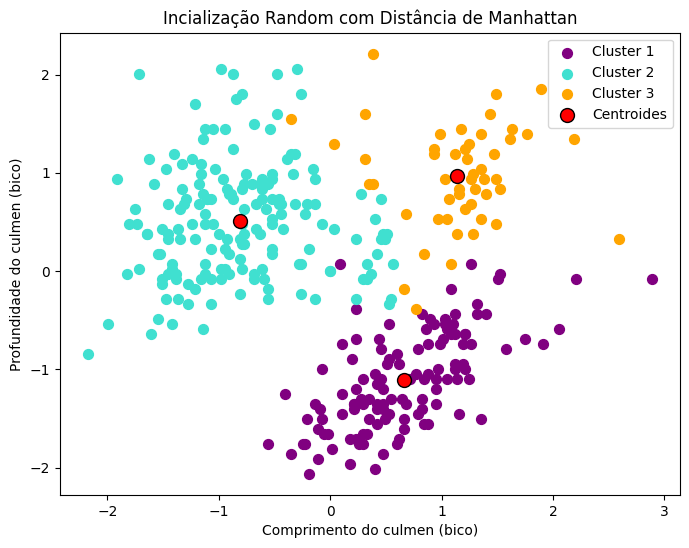

O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Biblioteca SciPy para calcular distâncias entre dois conjuntos de pontos
from scipy.spatial.distance import cdist
# Fornece suporte para operações matemáticas e manipulação de arrays numéricos
import numpy as np

# Medida de distância Manhattan

# Função para calcular o KMeans com distância de Manhattan
def kmeans_manhattan(X, n_clusters, max_iters=300, random_state=None):
    np.random.seed(random_state)
    
    # Inicializando os centroides aleatoriamente
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Calculando a matriz de distâncias de Manhattan
        distances = cdist(X, centroids, metric='cityblock')  # 'cityblock' é a distância de Manhattan
        
        # Atribuindo cada ponto ao cluster mais próximo
        labels = np.argmin(distances, axis=1)
        
        # Atualizando os centroides
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Verificando se houve mudança nos centroides
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Usando o kmeans_manhattan para calcular os clusters
centroids, labels = kmeans_manhattan(Xpenguins_scaled, n_clusters)

# Plotando os clusters com a distância de Manhattan
colors = ['purple', 'turquoise', 'orange'] 

plt.figure(figsize=(8, 6))

# Plotando os pontos com cores baseadas nos clusters
for i in range(n_clusters):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides (medoids)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Incialização Random com Distância de Manhattan")
plt.legend()
plt.show()

# Predição para um novo pinguim (calculando a distância de Manhattan)
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])

# Calculando as distâncias de Manhattan ao centroides
distances = cdist(novo_pinguim, centroids, metric='cityblock')
cluster_predito = np.argmin(distances)

print(f"O novo pinguim pertence ao cluster: {cluster_predito}")


Modelo com inicialização aleatória e distância de Manhattan:

Centroides dos clusters:
 [[ 0.65914815 -1.10319208  0.01222874  1.09494883]
 [-0.80645386  0.50965272 -0.09940034 -0.68368204]
 [ 1.13656778  0.97084023  0.30986648 -0.35538154]] 

WCSSE (Manhattan): 1052.1160951215313
--------------------------------------------------
O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


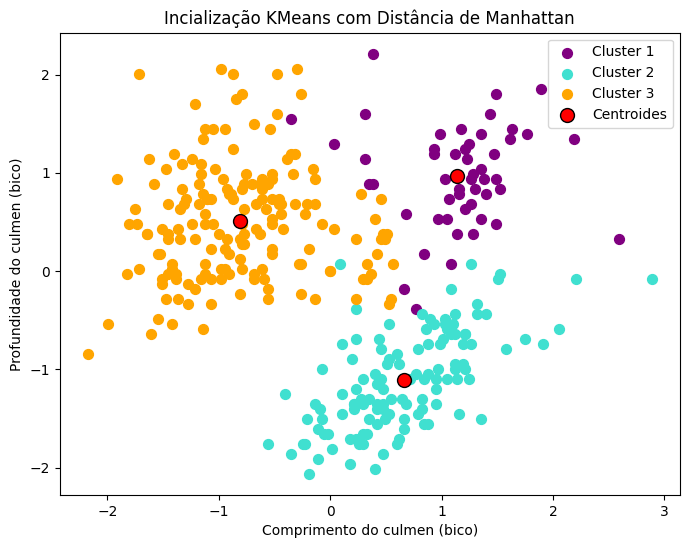

In [37]:
# Visualizar os dados armazenados ao usar KMeans com distância de Manhattan
print(f"Modelo com inicialização aleatória e distância de Manhattan:\n")
print("Centroides dos clusters:\n", centroids, "\n")

# Calculando a soma dos quadrados das distâncias intra-cluster (WCSSE)
# Aqui adaptamos o cálculo para a distância de Manhattan
wcsse = sum(
    np.sum(cdist(Xpenguins_scaled[labels == i], [centroids[i]], metric='cityblock'))
    for i in range(n_clusters)
)
print("WCSSE (Manhattan):", wcsse)
print("-" * 50)

# Exibir a previsão do cluster de um novo pinguim
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])
distances = cdist(novo_pinguim, centroids, metric='cityblock')
cluster_predito = np.argmin(distances)

print(f"O novo pinguim pertence ao cluster: {cluster_predito}")

# Usando o kmeans_manhattan para calcular os clusters
centroids, labels = kmeans_manhattan(Xpenguins_scaled, n_clusters)

# Plotando os clusters com a distância de Manhattan
colors = ['purple', 'turquoise', 'orange'] 

plt.figure(figsize=(8, 6))

# Plotando os pontos com cores baseadas nos clusters
for i in range(n_clusters):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides (medoids)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Incialização KMeans com Distância de Manhattan")
plt.legend()
plt.show()


WCSSE (Manhattan): 510.914894611763
--------------------------------------------------
O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


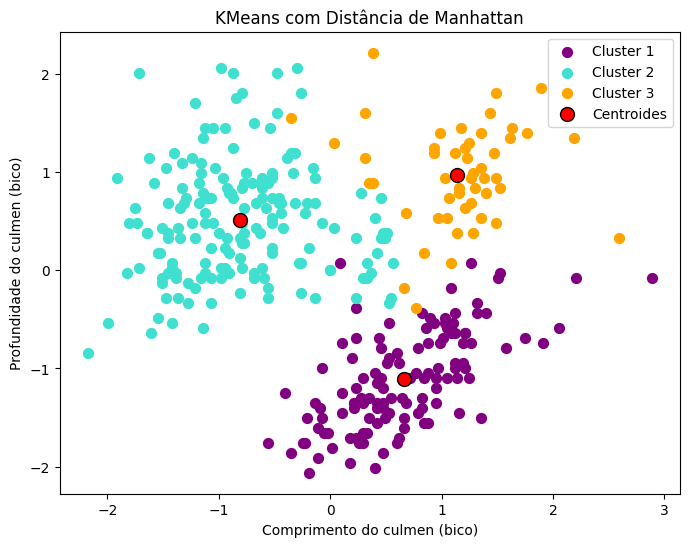

In [24]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Suposição: kmeans_manhattan está implementado ou disponível
# Centroides e labels retornados pelo modelo KMeans ou KMedoids
centroids, labels = kmeans_manhattan(Xpenguins_scaled, n_clusters)

# Calculando o WCSSE com distância de Manhattan
wcsse = sum(
    np.sum(cdist(Xpenguins_scaled[labels == i], [centroids[i]], metric='cityblock'))
    for i in range(n_clusters)
)
print("WCSSE (Manhattan):", wcsse)
print("-" * 50)

# Previsão de cluster para novo ponto
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])  # Novo pinguim escalado
distances = cdist(novo_pinguim, centroids, metric='cityblock')
cluster_predito = np.argmin(distances)
print(f"O novo pinguim pertence ao cluster: {cluster_predito}")

# Plotando os clusters
colors = ['purple', 'turquoise', 'orange']
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    plt.scatter(
        Xpenguins_scaled[labels == i][:, 0],  # Correção nos índices
        Xpenguins_scaled[labels == i][:, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=100,
    c='red',
    marker='o',
    edgecolor='black',
    label="Centroides"
)

plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("KMeans com Distância de Manhattan")
plt.legend()
plt.show()


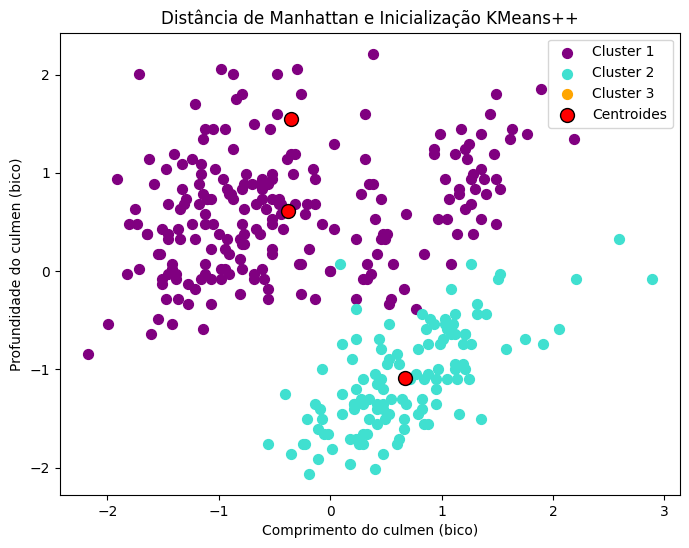

Modelo com inicialização KMeans++ e distância de Manhattan:

Centroides dos clusters:
 [[-3.80418100e-01  6.11013600e-01 -9.05283284e-02 -6.12377715e-01]
 [ 6.74718852e-01 -1.09163410e+00  1.11038004e-02  1.08105077e+00]
 [-3.53573761e-01  1.55064965e+00  1.84488327e+01  6.04240905e-02]] 

WCSSE (Manhattan): 568.525925518727
--------------------------------------------------
O novo pinguim pertence ao cluster: 0


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# Importando a biblioteca necessária
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Usando o KMeans com inicialização KMeans++ para calcular os clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=42)

# Ajustando o modelo aos dados escalonados
kmeans.fit(Xpenguins_scaled)

# Recuperando os centroides e os rótulos dos clusters após o ajuste do modelo
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizando os clusters com a distância de Manhattan
colors = ['purple', 'turquoise', 'orange']

plt.figure(figsize=(8, 6))

# Plotando os pontos com cores baseadas nos clusters
for i in range(n_clusters):
    plt.scatter(
        Xpenguins_scaled[labels == i, 0], 
        Xpenguins_scaled[labels == i, 1], 
        s=50, 
        c=colors[i], 
        label=f'Cluster {i+1}'
    )

# Plotando os centroides (medoids)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=100, 
    c='red', 
    marker='o', 
    edgecolor='black', 
    label="Centroides"
)

plt.xlabel("Comprimento do culmen (bico)")
plt.ylabel("Profundidade do culmen (bico)")
plt.title("Distância de Manhattan e Inicialização KMeans++")
plt.legend()
plt.show()

# Exibir os dados armazenados
print(f"Modelo com inicialização KMeans++ e distância de Manhattan:\n")
print("Centroides dos clusters:\n", centroids, "\n")

# Calculando a soma dos quadrados das distâncias intra-cluster (WCSSE) com Manhattan
wcsse = sum(
    np.sum(cdist(Xpenguins_scaled[labels == i], [centroids[i]], metric='cityblock'))
    for i in range(n_clusters)
)
print("WCSSE (Manhattan):", wcsse)
print("-" * 50)

# Predição para um novo pinguim (calculando a distância de Manhattan)
novo_pinguim = scaler.transform([[45.5, 17.4, 210, 4500]])

# Calculando as distâncias de Manhattan aos centroides
distances = cdist(novo_pinguim, centroids, metric='cityblock')

# Predição do cluster mais próximo
cluster_predito = np.argmin(distances)

print(f"O novo pinguim pertence ao cluster: {cluster_predito}")


In [26]:
# Contar o número de pontos em cada cluster
for i in range(n_clusters):
    count = np.sum(labels == i)
    print(f"Cluster {i}: {count} pontos")


Cluster 0: 219 pontos
Cluster 1: 124 pontos
Cluster 2: 1 pontos


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import numpy as np

# Função para executar o KMeans com distância Euclidiana ou Manhattan
def kmeans_with_distance(X, n_clusters, distance_metric, init_method='random'):
    # Inicializando o KMeans com a distância especificada e o método de inicialização
    if init_method == 'random':
        kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=300, random_state=42)
    elif init_method == 'k-means++':
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=42)
    
    # Ajustando o modelo aos dados
    kmeans.fit(X)
    
    # Caso a distância Manhattan seja utilizada, calculemos as distâncias de Manhattan
    if distance_metric == 'manhattan':
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        wcsse = sum(
            np.sum(cdist(X[labels == i], [centroids[i]], metric='cityblock')) 
            for i in range(n_clusters)
        )
        return kmeans, wcsse, labels, centroids
    else:  # Distância Euclidiana
        return kmeans, None, kmeans.labels_, kmeans.cluster_centers_

# Função para aplicar o Percentage Split
def percentage_split(X, n_clusters, distance_metric, init_method):
    # Dividindo os dados em treinamento e teste (80% treino, 20% teste)
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)[0], train_test_split(X, test_size=0.2, random_state=42)[1]
    
    # Treinando o modelo com os dados de treinamento
    model, wcsse, labels, centroids = kmeans_with_distance(X_train, n_clusters, distance_metric, init_method)
    
    # Avaliando o desempenho nos dados de teste
    test_labels = model.predict(X_test)
    
    # Silhouette score como métrica de avaliação
    silhouette = silhouette_score(X_test, test_labels, metric='euclidean' if distance_metric == 'euclidean' else 'cityblock')
    
    print(f"Modelo ({init_method}, {distance_metric}) - Silhouette Score:", silhouette)
    if wcsse:
        print(f"WCSSE (Manhattan) para o modelo ({init_method}, {distance_metric}):", wcsse)

# Função para aplicar a Cross-Validation
def cross_validation(X, n_clusters, distance_metric, init_method):
    # Avaliação utilizando Cross-Validation (5 dobras)
    scores = cross_val_score(KMeans(n_clusters=n_clusters, init=init_method, max_iter=300, random_state=42),
                             X, cv=5, scoring='neg_mean_squared_error')
    
    print(f"Modelo ({init_method}, {distance_metric}) - Cross-Validation MSE:", -scores.mean())

# Definir variáveis de entrada, como X (dados)
# Exemplo: X = Xpenguins_scaled

# Definindo o número de clusters
n_clusters = 3  # Defina conforme o seu caso

# Aplicando Percentage Split e Cross-Validation para todos os casos

# Caso 1: Random e Euclidean
print("\nPercentage Split: Random e Euclidean")
percentage_split(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='random')
print("\nCross Validation: Random e Euclidean")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='random')

# Caso 2: KMeans++ e Euclidean
print("\nPercentage Split: KMeans++ e Euclidean")
percentage_split(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='k-means++')
print("\nCross Validation: KMeans++ e Euclidean")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='k-means++')

# Caso 3: Random e Manhattan
print("\nPercentage Split: Random e Manhattan")
percentage_split(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='random')
print("\nCross Validation: Random e Manhattan")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='random')

# Caso 4: KMeans++ e Manhattan
print("\nPercentage Split: KMeans++ e Manhattan")
percentage_split(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='k-means++')
print("\nCross Validation: KMeans++ e Manhattan")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='k-means++')



Percentage Split: Random e Euclidean
Modelo (random, euclidean) - Silhouette Score: 0.3962098144630079

Cross Validation: Random e Euclidean


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _Scorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_s

Modelo (random, euclidean) - Cross-Validation MSE: nan

Percentage Split: KMeans++ e Euclidean
Modelo (k-means++, euclidean) - Silhouette Score: 0.3962098144630079

Cross Validation: KMeans++ e Euclidean
Modelo (k-means++, euclidean) - Cross-Validation MSE: nan

Percentage Split: Random e Manhattan
Modelo (random, manhattan) - Silhouette Score: 0.3836143000032205
WCSSE (Manhattan) para o modelo (random, manhattan): 373.71226340362466

Cross Validation: Random e Manhattan


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _Scorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_s

Modelo (random, manhattan) - Cross-Validation MSE: nan

Percentage Split: KMeans++ e Manhattan
Modelo (k-means++, manhattan) - Silhouette Score: 0.3836143000032205
WCSSE (Manhattan) para o modelo (k-means++, manhattan): 373.89650269023343

Cross Validation: KMeans++ e Manhattan
Modelo (k-means++, manhattan) - Cross-Validation MSE: nan


c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _Scorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Daniel\OneDrive\Documentos\GitRobson\Projeto_IA_Walmir\PLN\.venv\Lib\site-packages\sklearn\metrics\_s

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

# Função de Cross-Validation usando Silhouette Score
def cross_validation(X, n_clusters, distance_metric, init_method):
    # Usando KFold para dividir os dados
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    silhouette_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        
        # Treinando o modelo KMeans com o método de inicialização e a métrica de distância
        model, _, labels, _ = kmeans_with_distance(X_train, n_clusters, distance_metric, init_method)
        
        # Calculando o Silhouette Score para os dados de teste
        test_labels = model.predict(X_test)
        silhouette = silhouette_score(X_test, test_labels, metric='euclidean' if distance_metric == 'euclidean' else 'cityblock')
        silhouette_scores.append(silhouette)
    
    print(f"Modelo ({init_method}, {distance_metric}) - Cross-Validation Silhouette Score: {np.mean(silhouette_scores)}")

# Aplicando a Cross-Validation para os diferentes casos:
print("\nCross Validation: Random e Euclidean")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='random')

print("\nCross Validation: KMeans++ e Euclidean")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='euclidean', init_method='k-means++')

print("\nCross Validation: Random e Manhattan")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='random')

print("\nCross Validation: KMeans++ e Manhattan")
cross_validation(Xpenguins_scaled, n_clusters=n_clusters, distance_metric='manhattan', init_method='k-means++')



Cross Validation: Random e Euclidean
Modelo (random, euclidean) - Cross-Validation Silhouette Score: 0.4690610487228878

Cross Validation: KMeans++ e Euclidean
Modelo (k-means++, euclidean) - Cross-Validation Silhouette Score: 0.47669001125137855

Cross Validation: Random e Manhattan
Modelo (random, manhattan) - Cross-Validation Silhouette Score: 0.44407995725812305

Cross Validation: KMeans++ e Manhattan
Modelo (k-means++, manhattan) - Cross-Validation Silhouette Score: 0.48807449888015303


In [29]:
import pandas as pd

# Função para calcular as médias das variáveis por cluster
def cluster_summary(X, labels):
    df = pd.DataFrame(X, columns=['culmen_length_mm', 'culmen_depth_mm ', 'body_mass_g ', 'flipper_length_mm '])
    df['Cluster'] = labels
    cluster_means = df.groupby('Cluster').mean()
    print("\nMédias das variáveis por cluster:")
    print(cluster_means)

# Após aplicar o KMeans, calcule as médias para cada cluster
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(Xpenguins_scaled)
labels = model.labels_

cluster_summary(Xpenguins_scaled, labels)



Médias das variáveis por cluster:
         culmen_length_mm  culmen_depth_mm   body_mass_g   flipper_length_mm 
Cluster                                                                      
0               -0.380418          0.611014     -0.090528           -0.612378
1                0.674719         -1.091634      0.011104            1.081051
2               -0.353574          1.550650     18.448833            0.060424
